In [2]:
import numpy as np
import os

from utils.plot_utils import *
from utils.mesh_utils import *
from utils.file_utils import *
from basis.spline import *

## On a unit quad

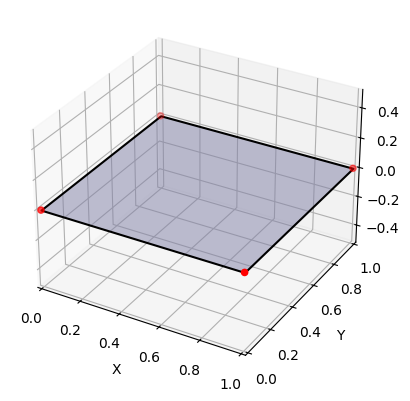

In [3]:
quad_vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
quad_faces = np.array([[0, 1, 2, 3]])

plot_mesh(quad_vertices, quad_faces)

[[0 1]
 [1 2]
 [0 3]
 [2 3]
 [0 2]]
[[0 1 2]
 [0 2 3]]


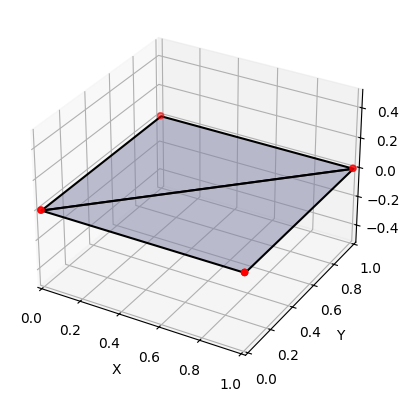

In [4]:
tri_vertices = quad_vertices
tri_edges, tri_faces = quad_to_triangle_mesh(quad_vertices, quad_faces)

print(tri_edges)
print(tri_faces)
plot_mesh(tri_vertices, tri_faces)

In [5]:
### TODO: Need to defined order!

num_points_per_side = 2
u_sample = np.linspace(0, 1, num_points_per_side)
v_sample = np.linspace(0, 1, num_points_per_side)
u_grid, v_grid = np.meshgrid(u_sample, v_sample)
u_flat = u_grid.flatten()
v_flat = v_grid.flatten()

W = np.array([flatten_tensor_product(tensor_product_linear(u, v)) for u, v in zip(u_flat, v_flat)])

print(W.shape)
print(W)

(4, 4)
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [6]:
save_folder = '2d-quad'
save_path = os.path.join('/Users/liujunyu/Desktop/Research/UVic_NYU/IGA_IPC/code/polyfem/experiments/mesh/iga-ipc', save_folder)

save_mesh_to_obj(quad_vertices, quad_faces, os.path.join(save_path, '2d-quad.obj'))
### TODO: Need to only write vertices and edges
save_mesh_to_obj(tri_vertices, tri_faces, os.path.join(save_path, '2d-quad-upsample.obj'))
# save_mapping_to_hdf5(W, tri_edges, tri_faces, os.path.join(save_path, '2d-quad-map.hdf5'))
# Currently hardcode for debug
quad_edges = [[0, 1], [1, 2], [2, 3], [3, 1]]
quad_faces = [[0, 1, 2, 3]]
# save_mapping_to_hdf5(W, quad_edges, quad_faces, os.path.join(save_path, '2d-quad-map.hdf5'))
path = os.path.join(save_path, '2d-quad-map.hdf5')
save_weights(path, W, n_fem_vertices=4)
                 